# Phase 4 Project

## Business Understanding
In the vast landscape of the film industry, where a multitude of genres, directors, actors, and production styles coexist, the process of choosing a movie to watch has become both a thrilling and daunting task for consumers. The sheer volume of content available on streaming platforms has made discovery challenging, leading to an increased demand for personalized recommendations.Delving into the nuances of user preferences, it is imperative  to seamlessly connect viewers with movies that resonate with their tastes, thus streamlining the process of discovering subsequent films within the same niche.

## Business Problem

The modern film enthusiast faces a paradox of choice - a wealth of cinematic options, yet a struggle to find films that align with their preferences. The challenge lies not only in the initial selection but also in the subsequent quest for movies within the same niche or genre. Users often find themselves lost in the vast sea of content, seeking a solution that not only recommends the first movie but also facilitates a fluid journey through related titles.

## Objectives:

1. Enhance user satisfaction and engagement by delivering highly personalized and
relevant movie recommendations
2. Improve customer retention by continuously tailoring suggestions based on changing
user preferences
3. Increase active usage and interactions with the platform through accurate
recommendations


## Differentiation Strategy:


- Fine-tune the recommendation models to account for unique characteristics of movie
preferences and viewing behaviors
- Prioritize transparency and user control by allowing customization of recommendation
filters


## Impact:

* Positive impact on key metrics including number of active users, time spent on platform,
recommendation accuracy
* Enhanced user experience leading to improved customer satisfaction and retention
* Increased adoption and continuous usage of platform due to high-quality
recommendations


## Scope:

* Utilize MovieLens latest dataset containing movie information, user ratings and tags
* Implement collaborative filtering, content-based models and a hybrid approach
* Focus on personalized suggestions tailored to each user's tastes and preferences

## Success Criteria:

- Increased user engagement measured by interactions and time spent
- Higher perceived relevance and satisfaction scores from user surveys
- Growth in registered and active user base attributable to recommendations
- Quantifiable improvements in recommendation accuracy metrics

## Data Understanding:

*Primary Data Source:*  

Our dataset, labeled *'ml-latest-small'*, is a comprehensive collection encompassing 100,836 ratings and 3,683 tag applications spread across 9,742 distinct movies. This rich dataset is the culmination of contributions from 610 individual users, spanning a period from March 29, 1996, to September 24, 2018. 

This project leverages data aggregated into four distinct, interconnected files:

### 1. Movies Dataset ('movies.csv'):

This file serves as a repository of fundamental movie details, offering insights into each movie's title and genre classification.   

*Key Columns:*

- *movieId:* This serves as the primary key, uniquely identifying each movie in the dataset.   

- *title:* Provides the movie’s title, inclusive of the release year bracketed within parentheses, offering a quick reference to the movie's era.

- *genres:* A list of genres associated with the movie, presented in a pipe-separated format, such as *'Action|Adventure|Comedy'*, aiding in categorical analysis.   

### 2. Links Dataset ('links.csv'):

Designed to facilitate connections with external, established movie databases like *IMDb* and *TMDb*, this file is crucial for expanding our understanding beyond the dataset.  

*Key Columns:*   

- *movieId:* The unique movie identifier, ensuring consistency across all files within the dataset.  
  
- *imdbId:* The specific identifier used by *IMDb (Internet Movie Database)* to reference the movie.  

- *tmdbId:* The identifier utilized by *TMDb (The Movie Database)* for the movie.  

### 3. Ratings Dataset ('ratings.csv'):

Central to understanding user preferences, this file encapsulates individual user ratings for movies, presented on a nuanced 5-star scale.  

*Key Columns:*  

- *userId:* The identifier representing each unique user within the dataset.  

- *movieId:* The unique identifier associated with each movie.  

- *rating:* Reflects the user's rating of the movie, scaled from 0.5 to 5.0 in half-star increments, providing a granular view of user preferences.  

- *timestamp:* Marks the exact moment the rating was logged, recorded as seconds elapsed since the midnight of January 1, 1970, UTC.  

### 4. Tags Dataset ('tags.csv'):

This file is a collection of user-generated tags that offer deeper insights into movies through personal interpretations and descriptors.  

*Key Columns:*   

- *userId:* The unique identifier for each participating user.  

- *movieId:* The consistent unique identifier for each movie across the dataset.  

- *tag:* User-generated tags that provide descriptive insights about a movie, typically concise phrases or single words.   

- *timestamp:* Indicates when the tag was applied, recorded in seconds since the midnight of January 1, 1970, UTC.  

Each of these files plays a pivotal role in creating a *holistic view* of the movie landscape, facilitating a more nuanced and personalized movie recommendation system.

## Data Pre-processing & EDA

In [34]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# %pip install wordcloud
from wordcloud import WordCloud

#### Loading the dataset

The given code defines a function, open_csv(file_path), that reads a CSV file into a Pandas DataFrame. It then prints the first few rows, DataFrame information, handles null values, checks and drops duplicates, explores data distributions with histograms, and performs outlier detection using boxplots. The code also includes exception handling for potential errors during file reading.

In [35]:

def open_csv(file_path):
    """
    Opens a CSV file and returns a Pandas DataFrame. 
    Prints the first few rows and provides DataFrame information.

    Parameters:
    - file_path (str): The path to the CSV file.

    Returns:
    - pd.DataFrame: The Pandas DataFrame containing the data from the CSV file.
    
    """
    try:
        # Use the read_csv function to read the CSV file into a DataFrame
        df = pd.read_csv(file_path)

        # Display the first few rows of the DataFrame
        print("First few rows of the DataFrame:")
        print(df.head())

        # Display DataFrame information
        print("\nDataFrame Information:")
        df.info()

        # Check for null values
        null_counts = df.isnull().sum()
        if null_counts.any():
            print("\nNull Value Counts:")
            print(null_counts)
        # Check for Duplicates and Drop
        print("Duplicates:")
        duplicates = df[df.duplicated()]
        print(duplicates)

        # Drop duplicates and update the DataFrame
        df = df.drop_duplicates()

        # Explore Data Distributions
        print("\nData Distributions:")
        df.hist(figsize=(12, 10), bins=20)
        plt.show()

        # Outlier Detection
        print("\nOutlier Detection:")
        numeric_cols = df.select_dtypes(include=[np.number]).columns
        for column in numeric_cols:
            sns.boxplot(x=df[column])
            plt.show()
    
        return df
    except Exception as e:
        # Handle exceptions (e.g., file not found, incorrect format)
        print(f"Error: {e}")
        return None


First few rows of the DataFrame:
   movieId  imdbId   tmdbId
0        1  114709    862.0
1        2  113497   8844.0
2        3  113228  15602.0
3        4  114885  31357.0
4        5  113041  11862.0

DataFrame Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9742 entries, 0 to 9741
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   movieId  9742 non-null   int64  
 1   imdbId   9742 non-null   int64  
 2   tmdbId   9734 non-null   float64
dtypes: float64(1), int64(2)
memory usage: 228.5 KB

Null Value Counts:
movieId    0
imdbId     0
tmdbId     8
dtype: int64
Duplicates:
Empty DataFrame
Columns: [movieId, imdbId, tmdbId]
Index: []

Data Distributions:


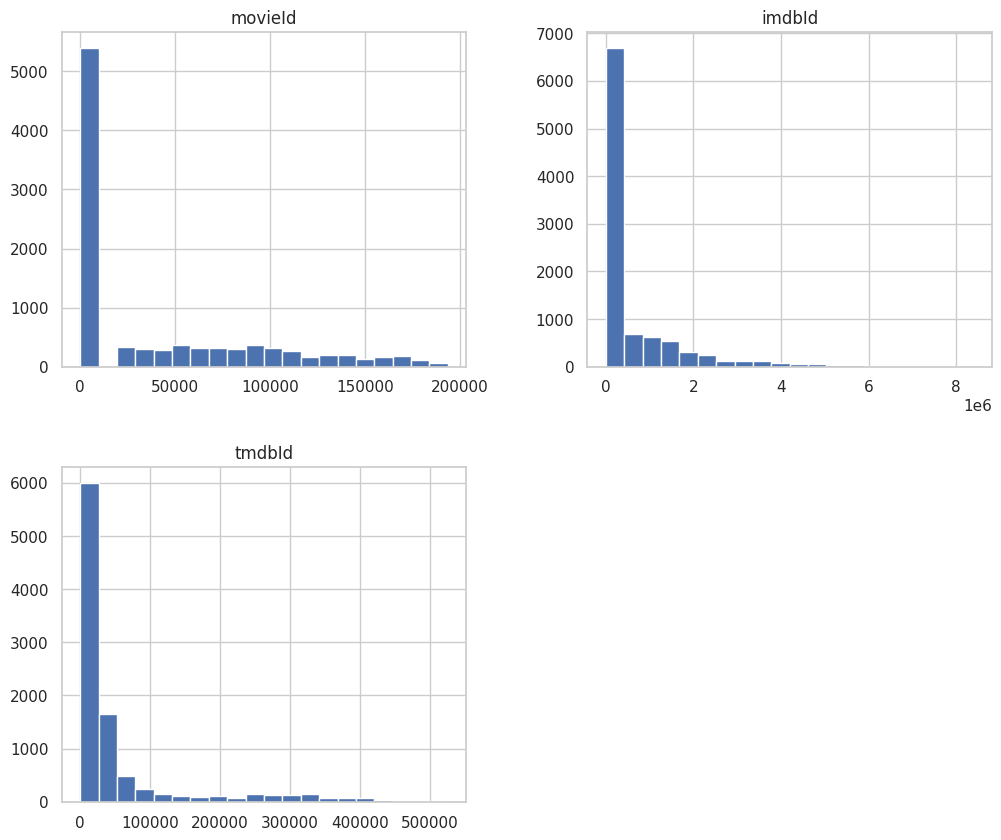


Outlier Detection:


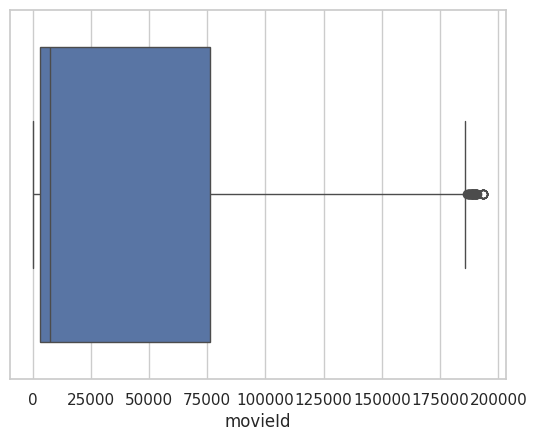

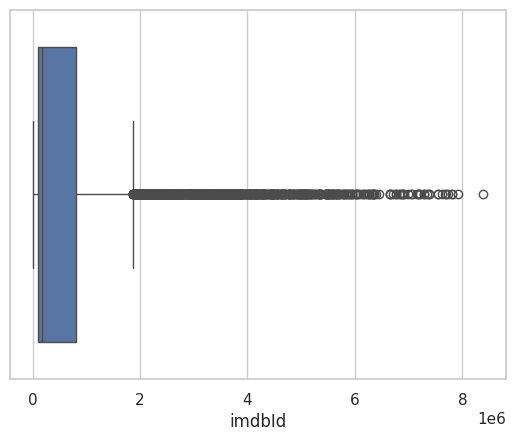

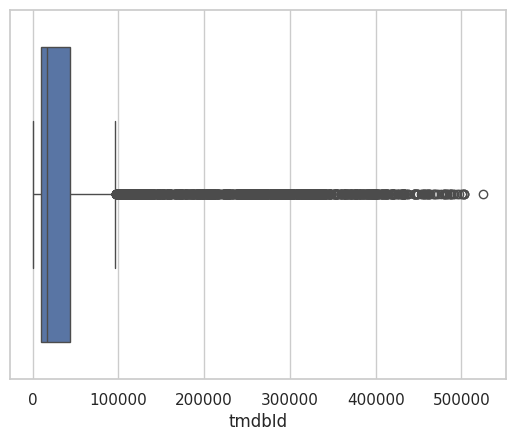

In [36]:
links_df = open_csv("ml-latest-small/links.csv")

In [37]:
links_df.dropna(inplace=True)

links_df.isnull().sum()

movieId    0
imdbId     0
tmdbId     0
dtype: int64

First few rows of the DataFrame:
   movieId                               title  \
0        1                    Toy Story (1995)   
1        2                      Jumanji (1995)   
2        3             Grumpier Old Men (1995)   
3        4            Waiting to Exhale (1995)   
4        5  Father of the Bride Part II (1995)   

                                        genres  
0  Adventure|Animation|Children|Comedy|Fantasy  
1                   Adventure|Children|Fantasy  
2                               Comedy|Romance  
3                         Comedy|Drama|Romance  
4                                       Comedy  

DataFrame Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9742 entries, 0 to 9741
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   movieId  9742 non-null   int64 
 1   title    9742 non-null   object
 2   genres   9742 non-null   object
dtypes: int64(1), object(2)
memory usage: 228.5+ KB
Dupli

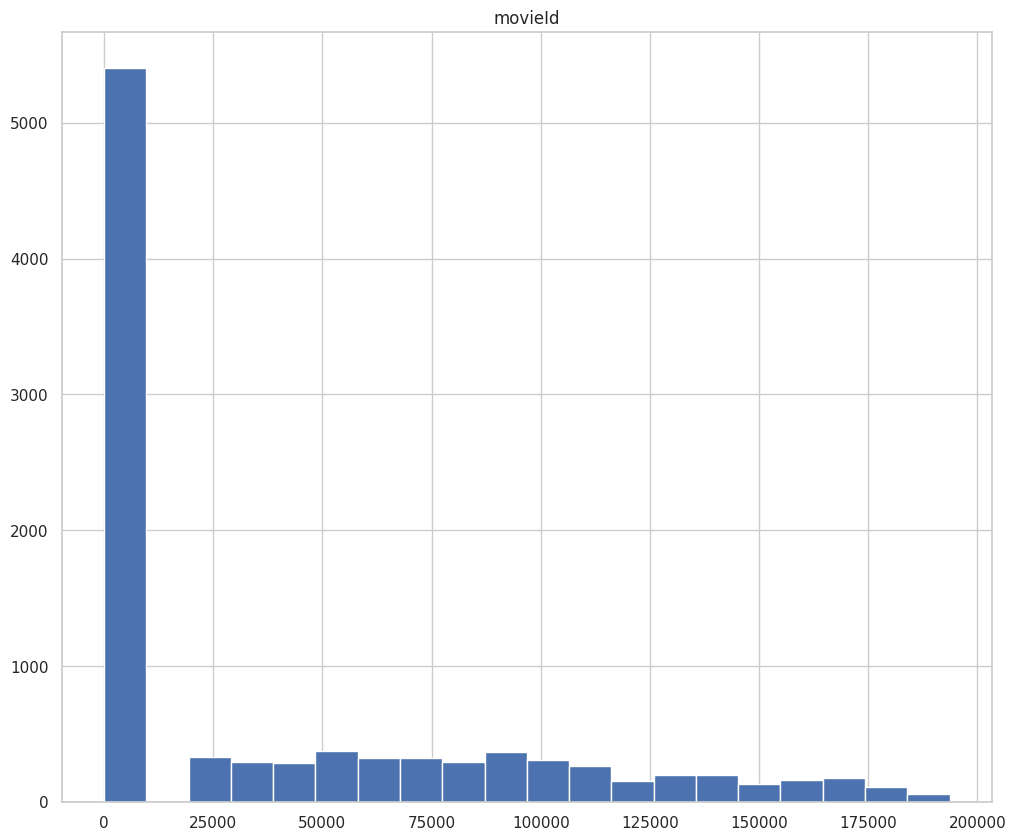


Outlier Detection:


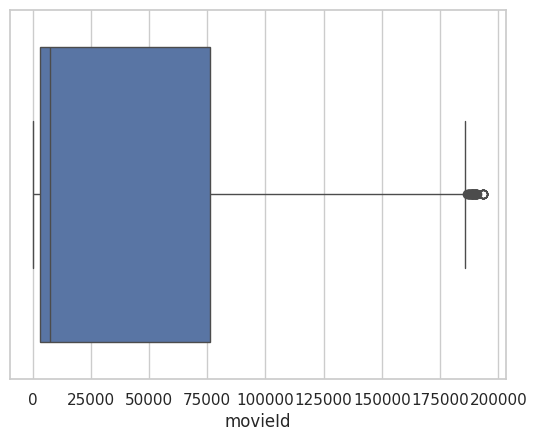

In [38]:

movies_df = open_csv("ml-latest-small/movies.csv")

First few rows of the DataFrame:
   userId  movieId  rating  timestamp
0       1        1     4.0  964982703
1       1        3     4.0  964981247
2       1        6     4.0  964982224
3       1       47     5.0  964983815
4       1       50     5.0  964982931

DataFrame Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100836 entries, 0 to 100835
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   userId     100836 non-null  int64  
 1   movieId    100836 non-null  int64  
 2   rating     100836 non-null  float64
 3   timestamp  100836 non-null  int64  
dtypes: float64(1), int64(3)
memory usage: 3.1 MB
Duplicates:
Empty DataFrame
Columns: [userId, movieId, rating, timestamp]
Index: []

Data Distributions:


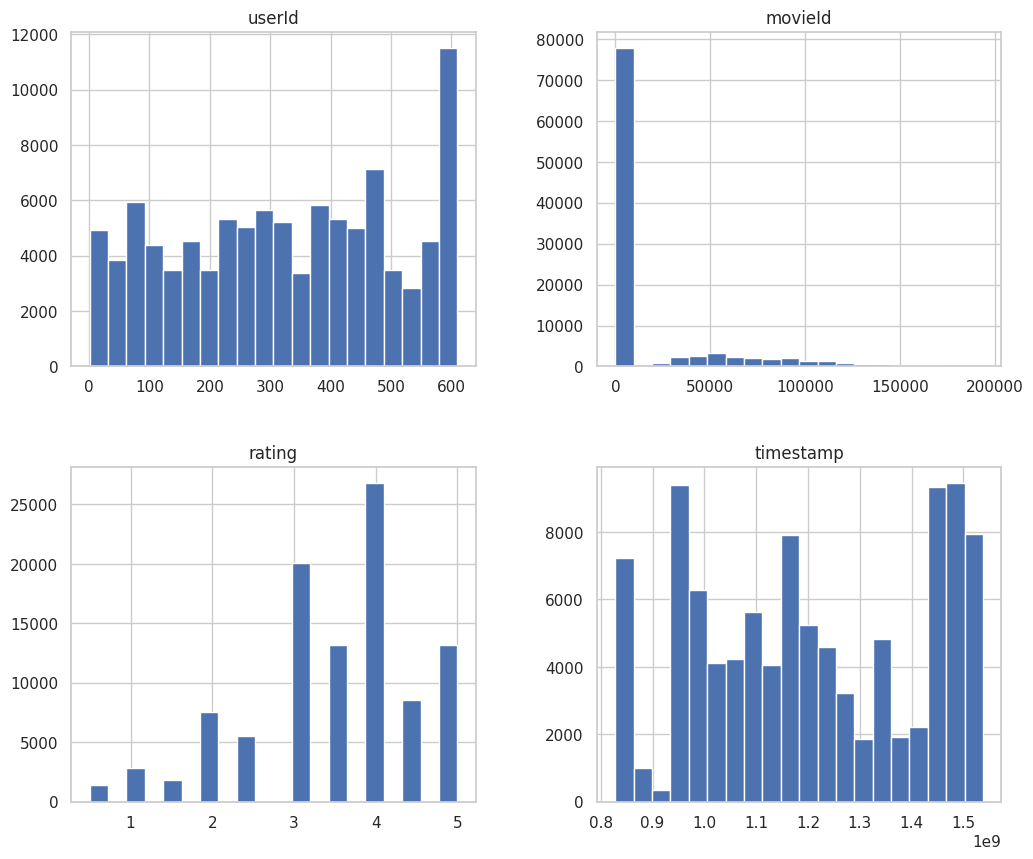


Outlier Detection:


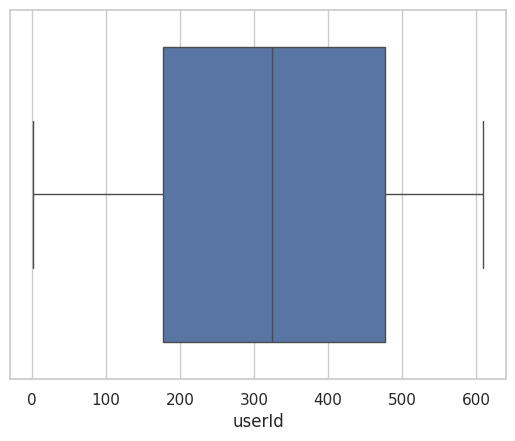

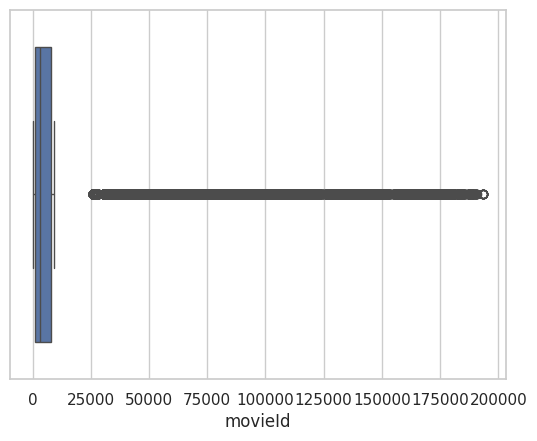

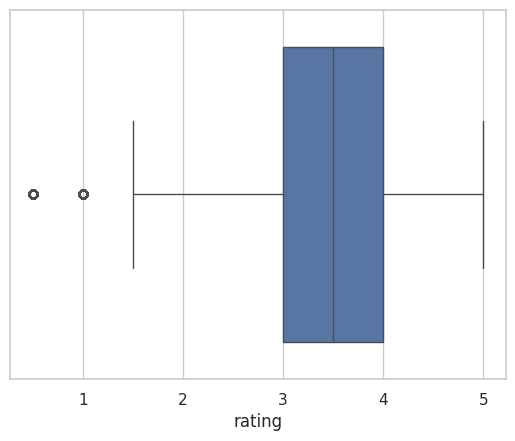

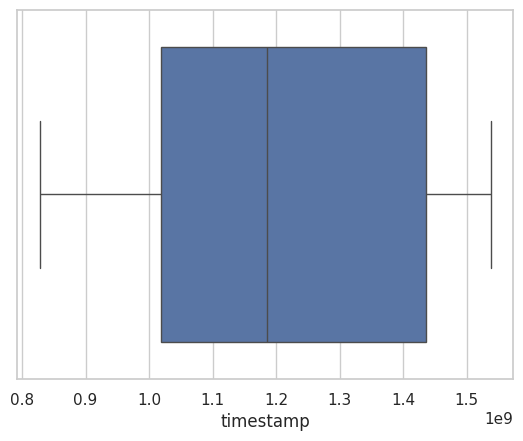

In [39]:

ratings_df = open_csv("ml-latest-small/ratings.csv")

First few rows of the DataFrame:
   userId  movieId              tag   timestamp
0       2    60756            funny  1445714994
1       2    60756  Highly quotable  1445714996
2       2    60756     will ferrell  1445714992
3       2    89774     Boxing story  1445715207
4       2    89774              MMA  1445715200

DataFrame Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3683 entries, 0 to 3682
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   userId     3683 non-null   int64 
 1   movieId    3683 non-null   int64 
 2   tag        3683 non-null   object
 3   timestamp  3683 non-null   int64 
dtypes: int64(3), object(1)
memory usage: 115.2+ KB
Duplicates:
Empty DataFrame
Columns: [userId, movieId, tag, timestamp]
Index: []

Data Distributions:


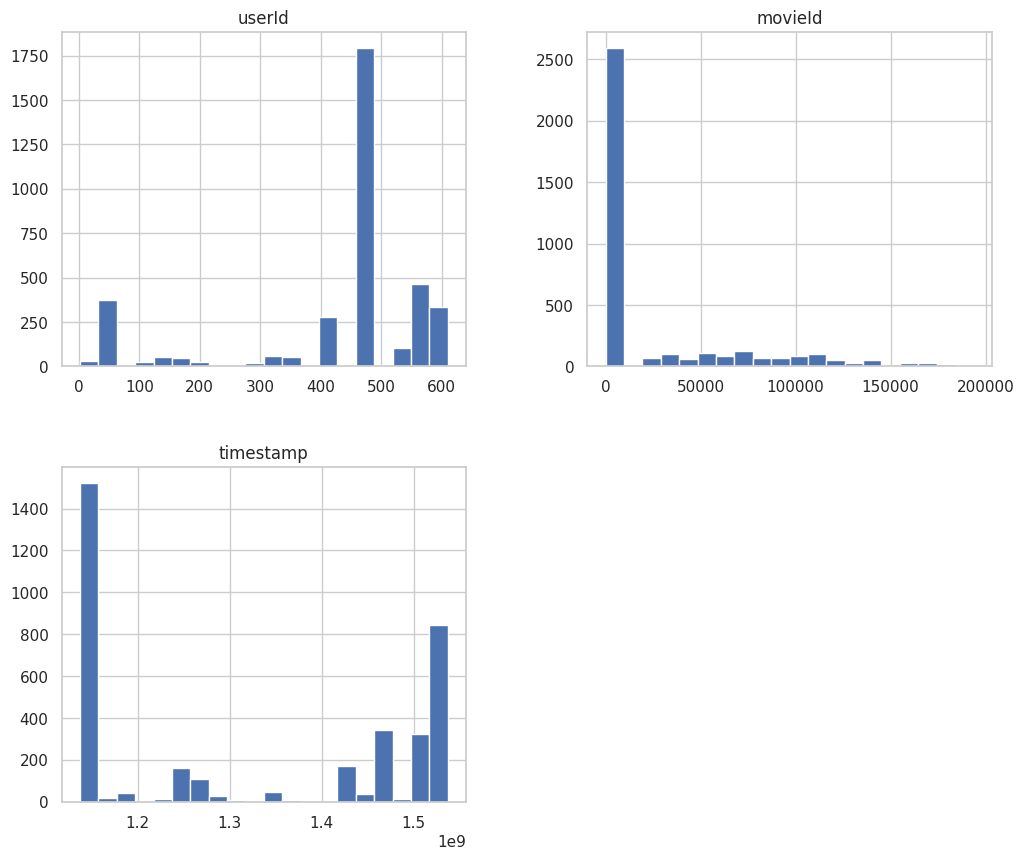


Outlier Detection:


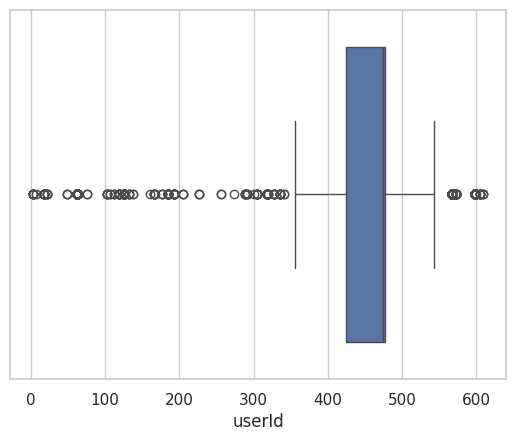

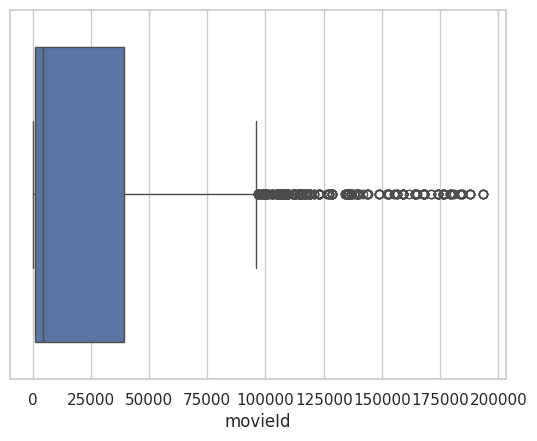

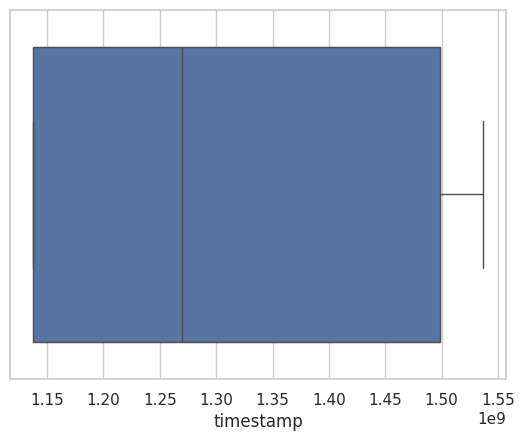

In [40]:

tags_df = open_csv("ml-latest-small/tags.csv")

### Distribution of movie genres

/tmp/ipykernel_61108/72838651.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=genre_counts.index, y=genre_counts.values, palette='viridis')


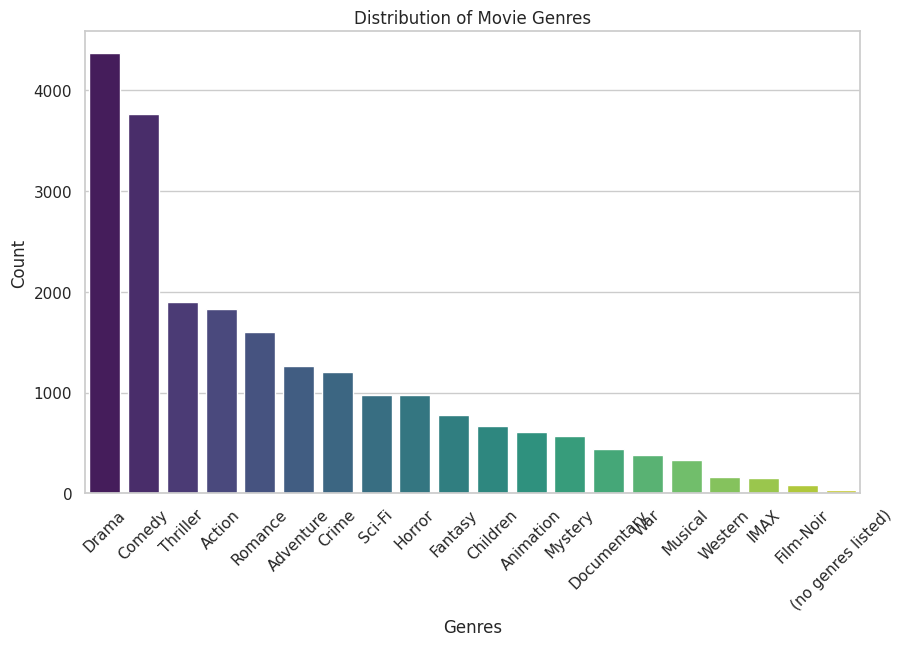

In [41]:
# Split genres into individual genres and create a new column 'genre_list'
movies_df['genre_list'] = movies_df['genres'].str.split('|')

# Count the occurrences of each genre after exploding the 'genre_list'
genre_counts = movies_df['genre_list'].explode().value_counts()

# Create a bar plot to visualize the distribution of movie genres
plt.figure(figsize=(10, 6))

# Use Seaborn to create a bar plot with better aesthetics
sns.barplot(x=genre_counts.index, y=genre_counts.values, palette='viridis')

# Set the plot title
plt.title('Distribution of Movie Genres')

# Set the x-axis label
plt.xlabel('Genres')

# Set the y-axis label
plt.ylabel('Count')

# Rotate x-axis labels for better readability
plt.xticks(rotation=45)

# Display the plot
plt.show()

Most movies appear to fall under drama and comedy

### Distribution of ratings

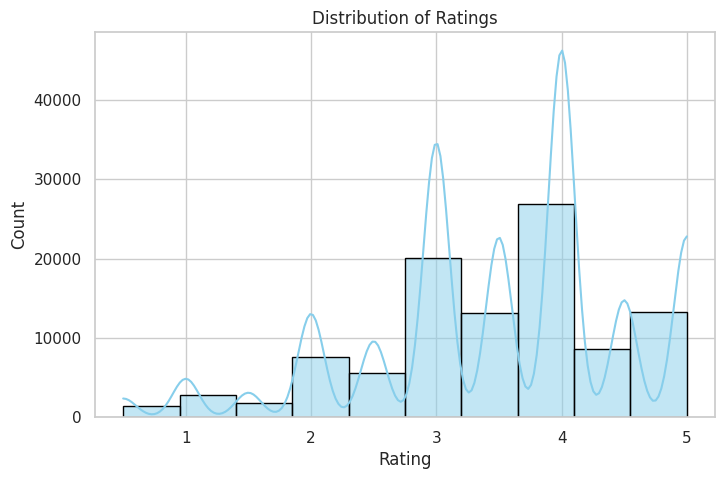

In [42]:
# Set the figure size
plt.figure(figsize=(8, 5))

# Create a histogram using Seaborn
sns.histplot(ratings_df['rating'], bins=10, kde=True, color='skyblue', edgecolor='black')

# Set the plot title
plt.title('Distribution of Ratings')

# Set the x-axis label
plt.xlabel('Rating')

# Set the y-axis label
plt.ylabel('Count')

# Display the plot
plt.show()

Most users give a rating of between 3 and 4 indicating that they are satisfied

### Distribution of 10 most common tags

/tmp/ipykernel_61108/3821565374.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=tag_counts.index, y=tag_counts.values, palette='muted')


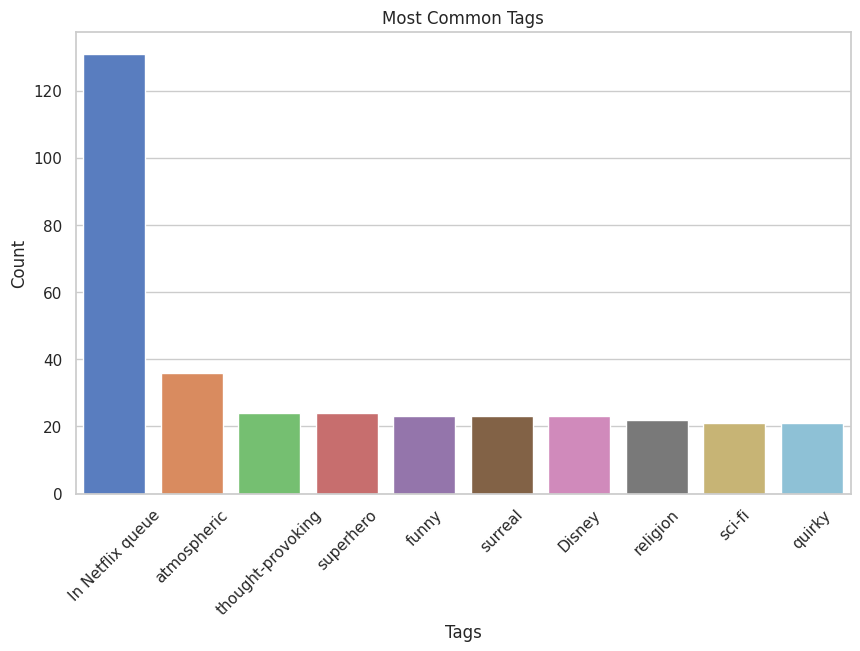

In [43]:
# Count the occurrences of each tag and select the top 10
tag_counts = tags_df['tag'].value_counts().head(10)

# Create a bar plot to visualize the most common tags
plt.figure(figsize=(10, 6))

# Use Seaborn to create a bar plot with better aesthetics
sns.barplot(x=tag_counts.index, y=tag_counts.values, palette='muted')

# Set the plot title
plt.title('Most Common Tags')

# Set the x-axis label
plt.xlabel('Tags')

# Set the y-axis label
plt.ylabel('Count')

# Rotate x-axis labels for better readability
plt.xticks(rotation=45)

# Display the plot
plt.show()

### Genre Correlation Heatmap

/tmp/ipykernel_61108/2060114506.py:2: FutureWarning: Returning a DataFrame from Series.apply when the supplied function returns a Series is deprecated and will be removed in a future version.
  genre_matrix = pd.get_dummies(movies_df['genre_list'].apply(pd.Series).stack()).groupby(level=0).sum()


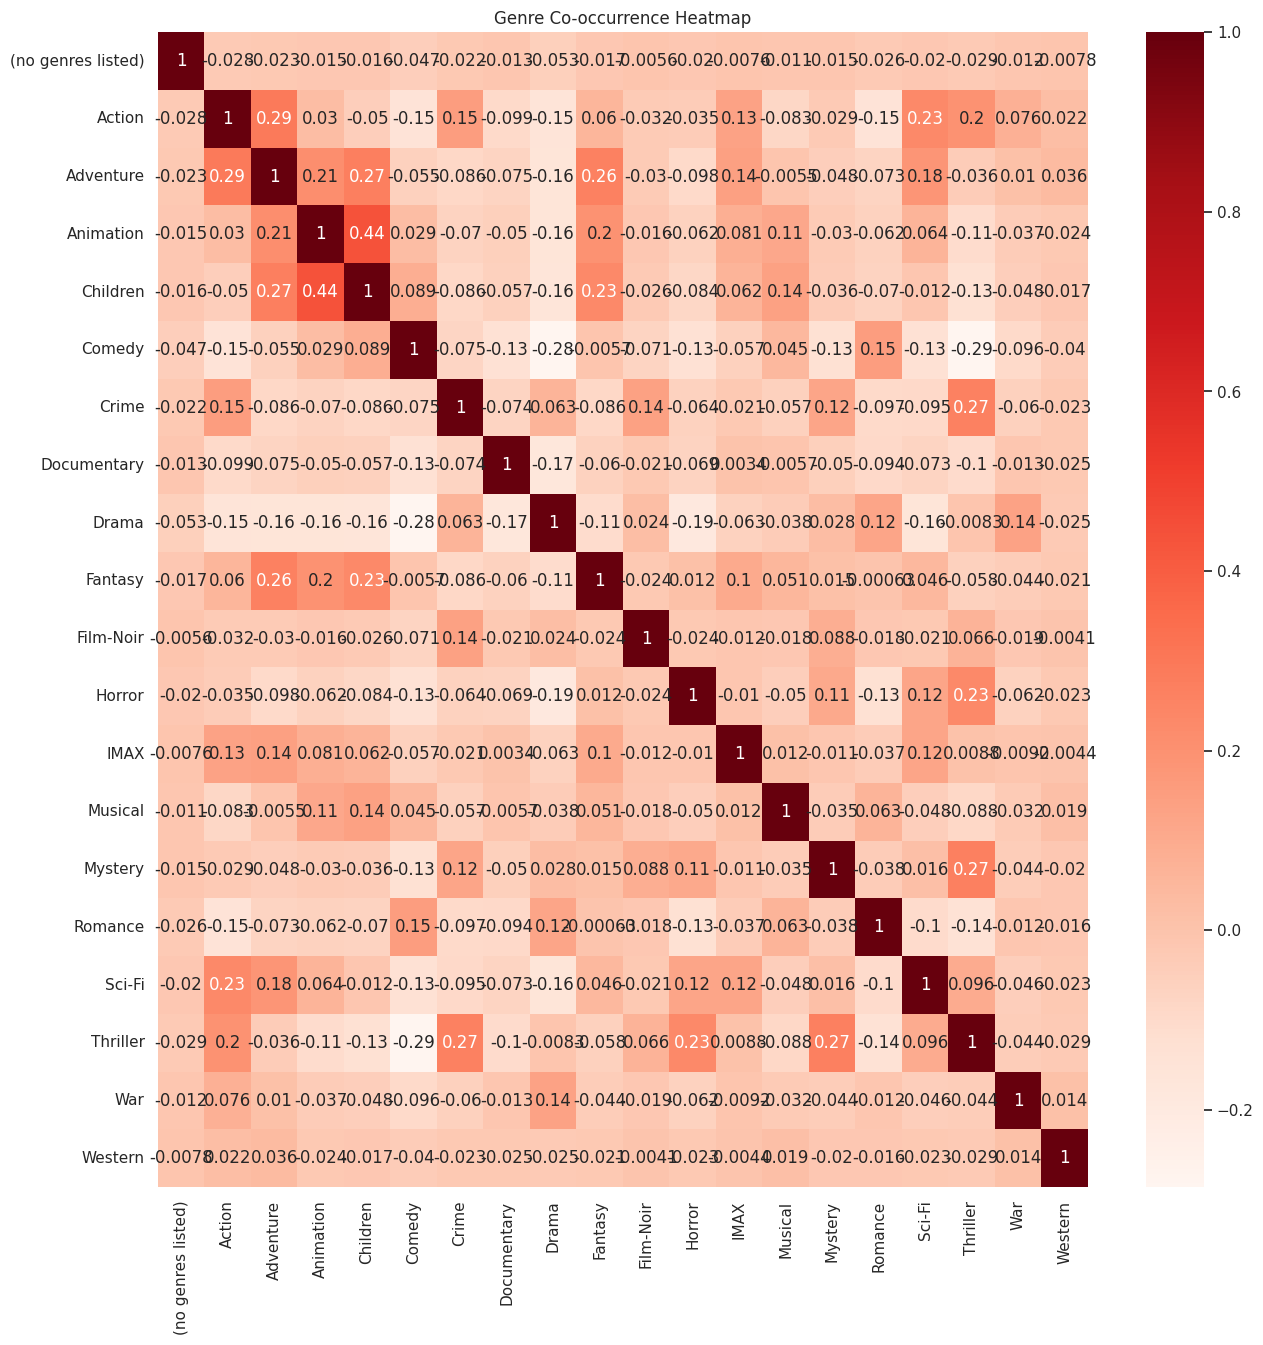

In [44]:
# Convert the 'genre_list' column into a binary genre matrix
genre_matrix = pd.get_dummies(movies_df['genre_list'].apply(pd.Series).stack()).groupby(level=0).sum()

# Create a heatmap of the genre co-occurrence matrix
plt.figure(figsize=(15, 15))

# Use Seaborn to plot the heatmap with correlation values annotated
sns.heatmap(genre_matrix.corr(), annot=True, cmap="Reds")

# Set the plot title
plt.title('Genre Co-occurrence Heatmap')

# Display the plot
plt.show()

### Rating trends over time

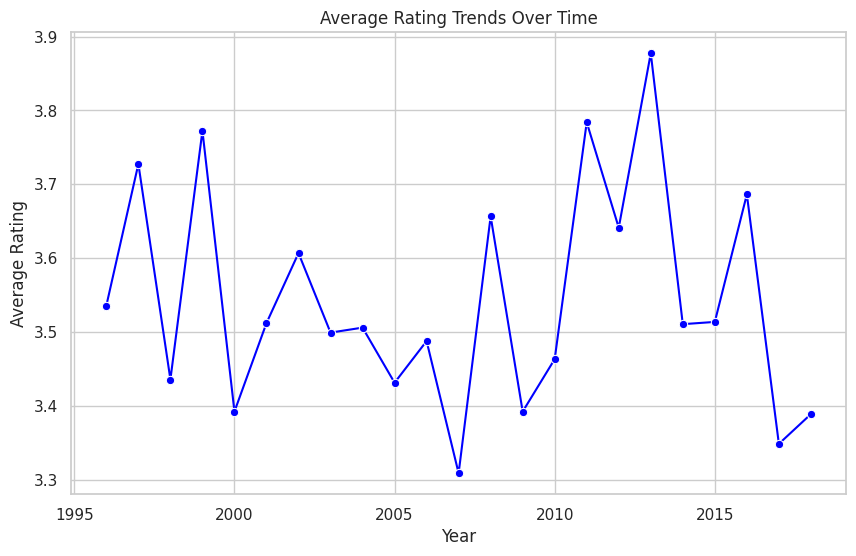

In [45]:
# Convert timestamp to datetime
ratings_df['timestamp'] = pd.to_datetime(ratings_df['timestamp'], unit='s')

# Group by year and calculate the mean rating per year
ratings_per_year = ratings_df.groupby(ratings_df['timestamp'].dt.year)['rating'].mean().reset_index()

# Set the Seaborn style
sns.set(style="whitegrid")

# Create a line plot using Seaborn
plt.figure(figsize=(10, 6))
sns.lineplot(x='timestamp', y='rating', data=ratings_per_year, marker='o', color='blue')

# Set plot title and labels
plt.title('Average Rating Trends Over Time')
plt.xlabel('Year')
plt.ylabel('Average Rating')

# Display the plot
plt.show()

### Generating a Word Cloud from movie tags

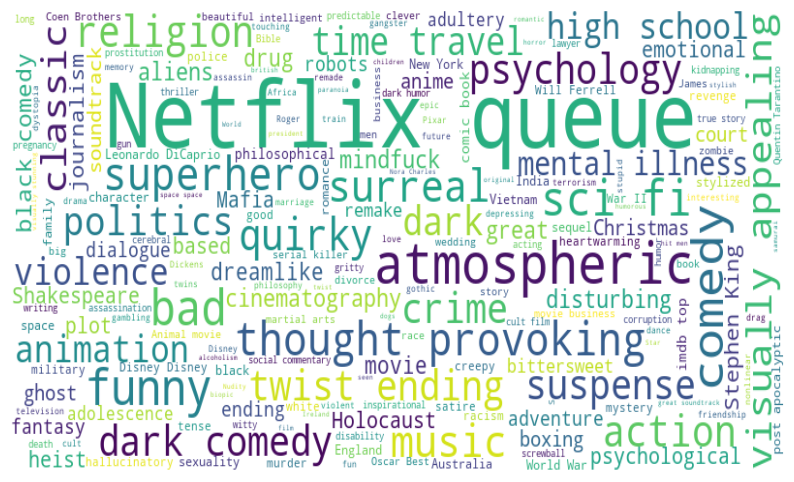

In [46]:

tag_text = ' '.join(tags_df['tag'])

# Generate the word cloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(tag_text)

# Create a Matplotlib figure
plt.figure(figsize=(10, 6))

# Display the word cloud image
plt.imshow(wordcloud, interpolation='bilinear', aspect='auto')

# Remove unnecessary axis labels
plt.axis('off')

# Show the plot
plt.show()

### Merging datasets

In [47]:
# Using join with movies_df as the left DataFrame
merged_movies_links = movies_df.join(links_df.set_index("movieId"), on="movieId", how="inner")

# Displaying the shape of the new DataFrame
print(merged_movies_links.shape)

(9734, 6)


In [48]:
# Left outer join with ratings_df and specify suffixes
merged_data_ratings = merged_movies_links.join(ratings_df.set_index("movieId"), on="movieId", how="left", lsuffix='_movies_links', rsuffix='_ratings')

# Left outer join with tags_df and specify suffixes
df = merged_data_ratings

# Displaying the head of the new DataFrame
print(f"Final Merged Data has {df.shape[0]} rows and {df.shape[1]} columns:")
df.head()


Final Merged Data has 100841 rows and 9 columns:


,movieId,title,genres,genre_list,imdbId,tmdbId,userId,rating,timestamp
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,"[Adventure, Animation, Children, Comedy, Fantasy]",114709,862.0,1.0,4.0,2000-07-30 18:45:03
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,"[Adventure, Animation, Children, Comedy, Fantasy]",114709,862.0,5.0,4.0,1996-11-08 06:36:02
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,"[Adventure, Animation, Children, Comedy, Fantasy]",114709,862.0,7.0,4.5,2005-01-25 06:52:26
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,"[Adventure, Animation, Children, Comedy, Fantasy]",114709,862.0,15.0,2.5,2017-11-13 12:59:30
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,"[Adventure, Animation, Children, Comedy, Fantasy]",114709,862.0,17.0,4.5,2011-05-18 05:28:03


### Distribution of genres over the years

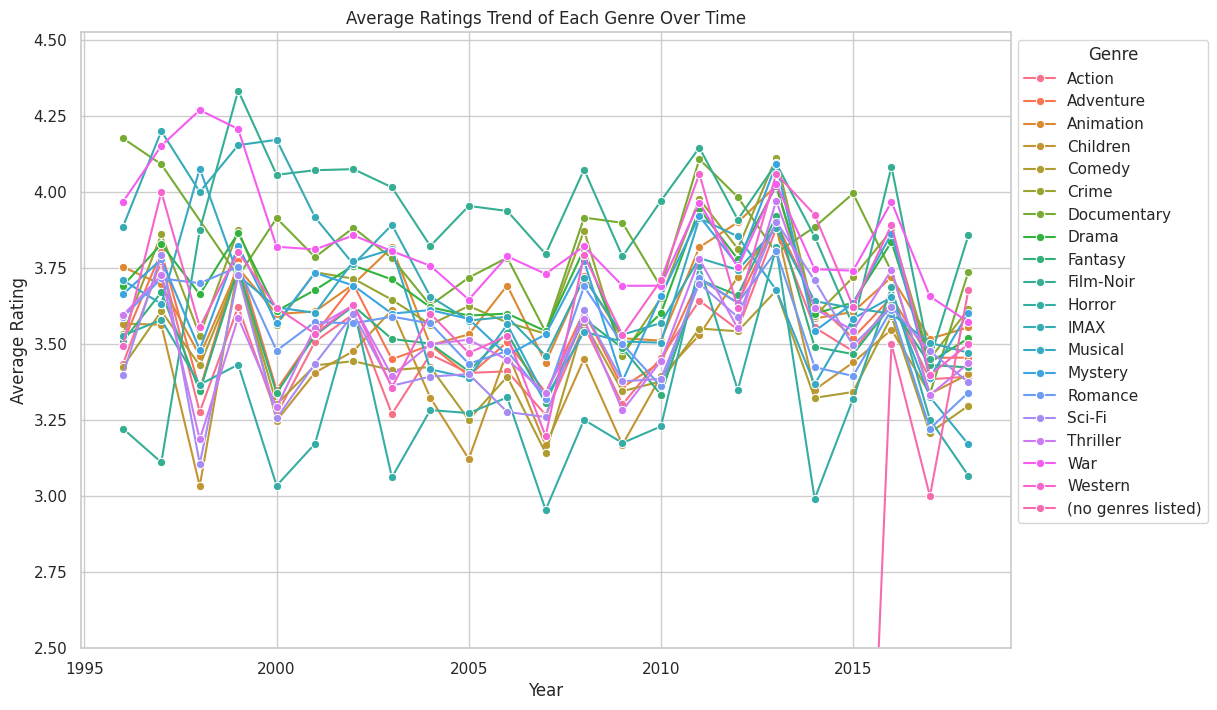

In [49]:
# Extract year from timestamp
df['year'] = df['timestamp'].dt.year

# Explode genre_list to separate rows
df_expanded = df.explode('genre_list')

# Group by year and genre, calculate mean rating
genre_ratings_per_year = df_expanded.groupby(['year', 'genre_list'])['rating'].mean().reset_index()

# Set Seaborn style
sns.set(style="whitegrid")

# Create a line plot using Seaborn
plt.figure(figsize=(12, 8))
sns.lineplot(x='year', y='rating', hue='genre_list', data=genre_ratings_per_year, marker='o')

plt.ylim(2.5, None)
# Set plot title and labels
plt.title('Average Ratings Trend of Each Genre Over Time')
plt.xlabel('Year')
plt.ylabel('Average Rating')

# Display the legend
plt.legend(title='Genre', loc='upper left', bbox_to_anchor=(1, 1))

# Show the plot
plt.show()

### Distribution of movie titles based on popularity

/tmp/ipykernel_61108/3343656917.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='popularity', y='title', data=top_movies, palette='viridis')


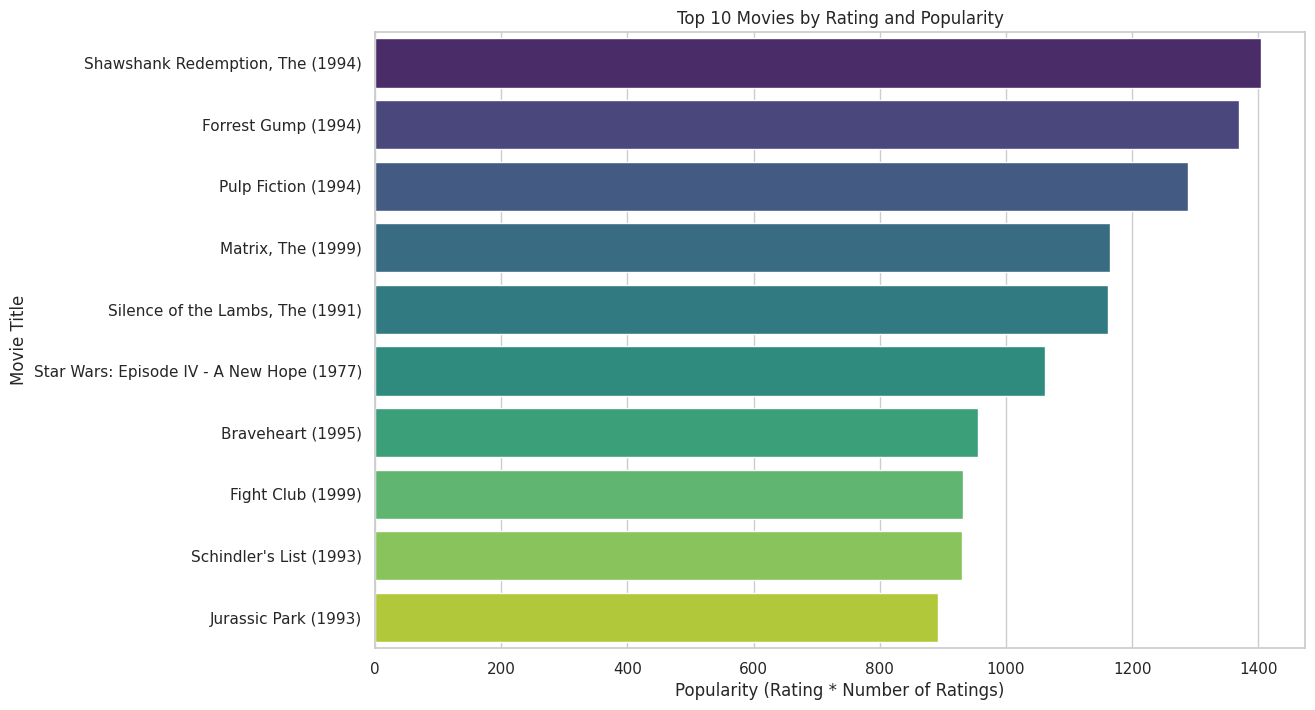

In [65]:
# Group by 'title', calculate mean rating and count of ratings
movie_ratings = df.groupby('title')['rating'].agg(['mean', 'count']).reset_index()

# Calculate popularity by multiplying mean rating by the count of ratings
movie_ratings['popularity'] = movie_ratings['mean'] * movie_ratings['count']

# Sort DataFrame by popularity in descending order
top_movies = movie_ratings.sort_values(by='popularity', ascending=False).head(10)

# Set Seaborn style
sns.set(style="whitegrid")

# Create a bar plot using Seaborn
plt.figure(figsize=(12, 8))
sns.barplot(x='popularity', y='title', data=top_movies, palette='viridis')

# Set plot title and labels
plt.title('Top 10 Movies by Rating and Popularity')
plt.xlabel('Popularity (Rating * Number of Ratings)')
plt.ylabel('Movie Title')

# Display the plot
plt.show()

In [66]:
df.to_csv("merged_data.csv", index=False)

###               MODELLING

In [50]:
import pandas as pd
# import scikit-learn as sklearn
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.preprocessing import MultiLabelBinarizer

Modelling inolves the following steps: 

1.Feature engineering

2.Splitting data

3.Buildng and fitting the model

4.Make predictions for each user in the test set and predict the ratings for unrated movies

5.Work with an evaluation metric

Drop unnecessary columns for the initial model ie time stamp, genres, title

In [51]:
def drop_columns(df, columns):
    #df_copy= df.copy()
    df.drop(columns, inplace= True,axis = 1)

    return df

In [52]:
columns=['timestamp','genres']
drop_columns(df,columns)

,movieId,title,genre_list,imdbId,tmdbId,userId,rating,year
0,1,Toy Story (1995),"[Adventure, Animation, Children, Comedy, Fantasy]",114709,862.0,1.0,4.0,2000.0
0,1,Toy Story (1995),"[Adventure, Animation, Children, Comedy, Fantasy]",114709,862.0,5.0,4.0,1996.0
0,1,Toy Story (1995),"[Adventure, Animation, Children, Comedy, Fantasy]",114709,862.0,7.0,4.5,2005.0
0,1,Toy Story (1995),"[Adventure, Animation, Children, Comedy, Fantasy]",114709,862.0,15.0,2.5,2017.0
0,1,Toy Story (1995),"[Adventure, Animation, Children, Comedy, Fantasy]",114709,862.0,17.0,4.5,2011.0
...,...,...,...,...,...,...,...,...
9737,193581,Black Butler: Book of the Atlantic (2017),"[Action, Animation, Comedy, Fantasy]",5476944,432131.0,184.0,4.0,2018.0
9738,193583,No Game No Life: Zero (2017),"[Animation, Comedy, Fantasy]",5914996,445030.0,184.0,3.5,2018.0
9739,193585,Flint (2017),[Drama],6397426,479308.0,184.0,3.5,2018.0
9740,193587,Bungo Stray Dogs: Dead Apple (2018),"[Action, Animation]",8391976,483455.0,184.0,3.5,2018.0


POPULARITY BASED RECOMMENDER

Popularity based recommender systems are preferred because:

1. **Simplicity:** Easy implementation and straightforward.

2. **No User History Required:** Suitable for new or sparse datasets without relying on user-specific data.

3. **Cold Start Problem:** Addresses the challenge of limited user interaction data.

4. **Diversity:** Introduces users to popular, widely-liked items for broad appeal.

5. **Robustness:** Resilient to outliers, as recommendations are based on overall item popularity.

In [53]:
# Drop rows with missing values in the 'rating' column
df_cleaned = df.dropna(subset=['rating'])

# Calculate the average rating across all users and items
average_rating = df_cleaned['rating'].mean()

# Create a constant predicted rating for all user-item pairs
predicted_ratings = np.full(len(df_cleaned), average_rating)

# Calculate RMSE between actual ratings and predicted ratings
rmse = np.sqrt(mean_squared_error(df_cleaned['rating'], predicted_ratings))

# Print the RMSE
print("RMSE for Popularity-Based Recommender:", rmse)

RMSE for Popularity-Based Recommender: 1.0424246625040083


The Popularity-Based Recommender's RMSE of approximately 1.0425 indicates a substantial deviation, considering the rating scale of 0.5 to 5. This high RMSE highlights the need for a more effective model with improved accuracy.

Experimenting with different parameters and fine-tuning the model can enhance the recommendation system's effectiveness.

In [54]:
print(df['rating'].isnull().sum())

18


In [55]:
df['rating'].fillna(0, inplace=True)

#### Loading surprise Library

We will use the surprise library validate our models The Surprise library is used for more advanced collaborative filtering techniques. The dataset is loaded into Surprise's format, specifying a rating scale of 1 to 5.

In [56]:
from surprise import Reader, Dataset
from surprise.model_selection import train_test_split

# Assuming df contains columns 'userId', 'movieId', and 'rating'
reader = Reader()
surprise_data = Dataset.load_from_df(df[['userId', 'movieId', 'rating']], reader)

# Split the data into training and test sets
trainset, testset = train_test_split(surprise_data, test_size=0.2, random_state=42)

# Now, trainset and testset are ready for model training and evaluation


#### ADVANCED MODELLING

This segment introduces User-Based Collaborative Filtering, Singular Value Decomposition (SVD), K-Nearest Neighbors (KNN) with means, and K-Nearest Neighbors (KNN) basic (KNNBasic) models, along with their respective RMSE values.

In [57]:
from surprise import accuracy
from surprise.model_selection import train_test_split
from surprise import KNNBasic, KNNWithMeans, SVD
from surprise import Dataset, Reader

Different KNN-based models KNNBasic, KNNWithMeans and SVD are trained and evaluated using cross-validation. The Pearson similarity metric is employed for KNN models. The performance is measured using RMSE (Root Mean Square Error).

The KNNBasic model from the surprise library is used with the option user_based set to True. It is User-Based Model: Utilizes user similarity to make recommendations.

The KNNBasic model is an Item-Based Model: Focuses on item (movie) similarities. So its user_based set to False.

Singular Value Decomposition (SVD): A matrix factorization technique that is critical for our recommendation systems.SVD employs a matrix factorization technique in a recommendation systems like ours to uncover latent features underlying the interactions between users and items (movies). It helps in capturing complex patterns in the data which might not be immediately apparent.

In [58]:
# Initialize the models
user_based_model = KNNBasic(sim_options={'user_based': True})
user_based_model.fit(trainset)

knn_with_means_model = KNNWithMeans(sim_options={'user_based': True})
knn_with_means_model.fit(trainset)

svd_model = SVD()
svd_model.fit(trainset)

knn_basic_model = KNNBasic(sim_options={'user_based': False})
knn_basic_model.fit(trainset)

# Make predictions on the test set
user_based_predictions = user_based_model.test(testset)
knn_with_means_predictions = knn_with_means_model.test(testset)
svd_predictions = svd_model.test(testset)
knn_basic_predictions = knn_basic_model.test(testset)

# Calculate RMSE 
user_based_rmse = accuracy.rmse(user_based_predictions)
knn_with_means_rmse = accuracy.rmse(knn_with_means_predictions)
svd_rmse = accuracy.rmse(svd_predictions)
knn_basic_rmse = accuracy.rmse(knn_basic_predictions)

# Print the RMSE for each model
print("User-Based Collaborative Filtering RMSE:", user_based_rmse)
print("\nK-Nearest Neighbors with Means RMSE:", knn_with_means_rmse)
print("\nSVD RMSE:", svd_rmse)
print("\nK-Nearest Neighbors Basic RMSE:", knn_basic_rmse)


Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.


Computing the msd similarity matrix...
Done computing similarity matrix.
RMSE: 0.9508
RMSE: 0.8999
RMSE: 0.8819
RMSE: 0.9134
User-Based Collaborative Filtering RMSE: 0.9508204907011504

K-Nearest Neighbors with Means RMSE: 0.8999256300443209

SVD RMSE: 0.8819044806501188

K-Nearest Neighbors Basic RMSE: 0.9133878300866659


The SVD model has the lowest RMSE, meaning it is the most accurate in predicting movie ratings on unseen data. Hence SVD is likely the best approach for a movie recommendation system out of the evaluated models.

#### MODEL TUNING

In [59]:
from surprise.model_selection import GridSearchCV

# Parameter grid for grid search
param_grid = {'n_epochs': [5, 10, 15], 'lr_all': [0.002, 0.005, 0.01], 'reg_all': [0.02, 0.04, 0.06]}

# Initialize GridSearchCV with SVD model
grid_search = GridSearchCV(SVD, param_grid, measures=['rmse'], cv=3)

# Perform grid search on the surprise data
grid_search.fit(surprise_data)

# Retrieve best RMSE score and corresponding parameters
best_rmse, best_params = grid_search.best_score['rmse'], grid_search.best_params['rmse']

print(f"Best RMSE: {best_rmse}")
print("Best Parameters:")
for param, value in best_params.items():
    print(f"{param}: {value}")


Best RMSE: 0.8718457666177569
Best Parameters:
n_epochs: 15
lr_all: 0.01
reg_all: 0.06


The best Root Mean Squared Error (RMSE) achieved is 0.8713. The optimal parameters for the Singular Value Decomposition (SVD) model are found to be 15 epochs, a learning rate of 0.01, and a regularization term of 0.06. These parameters represent the configuration that minimizes the prediction error on the given dataset.

##### Optimizing SVD Model Training with Best Parameters

In [60]:
# Train SVD model with best parameters
trained_svd_model = SVD(n_epochs=15, lr_all=0.01, reg_all=0.06).fit(trainset)
trained_svd_model

#### DEPLOYMENT

Top 5 movie recommendations based on user's ratings:

1. Accessing user preferences through ID 610.
2. Employing a robust Singular Value Decomposition (SVD) model.
3. Tailoring movie recommendations based on past user ratings.
4. Presenting five top-notch film suggestions for a personalized viewing experience.
5. Encouraging exploration of these recommended movies to enhance your cinematic journey.

In [61]:
# Prompt the user for their user ID
while True:
    try:
        user_id = int(input("Enter your user ID (an integer): "))
        if 1 <= user_id <= 610:
            break
        else:
            # print(f"Welcome User {user_id}, Here are the top 5 movies Based on movie Rating:\n"
            #       f"1. Shawshank Redemption, The (1994)\n"
            #       f"2. Forest Gump (1994)\n"
            #       f"3. Pulp Fiction (1994)\n"
            #       f"4. Matrix, The (1999)\n"
            #       f"5. Silence of the Lambs, The (1991)")
             break
    except ValueError:
        print("Invalid input. Please enter a valid integer.")

# Check if the user exists in the ratings dataset
if user_id in df['userId'].unique():
    # User is an existing user
    print(f"Welcome back User {user_id}, Here are movies you may like:")

    # Get unrated movies for the user
    unrated_movie_ids = [movie_id for movie_id in trainset.all_items() if movie_id not in trainset.ur[user_id]]

    # Predict ratings for unrated movies using the trained SVD model
    recommendations = [(movie_id, trained_svd_model.predict(user_id, movie_id).est) for movie_id in unrated_movie_ids]

    # Sort and get the top 5 unique movie recommendations
    top_recommendations = sorted(set(recommendations), key=lambda x: x[1], reverse=True)[:5]

    # Print the top 5 movie recommendations
    print("\nTop 5 movie recommendations based on your ratings:")
    for idx, (movie_id, predicted_rating) in enumerate(top_recommendations):
        movie_title = df[df['movieId'] == movie_id]['title'].values[0]
        print(f"Recommendation #{idx + 1}: {movie_title}")

else:
    if user_id > 610:
        # Recommend top movies for users beyond ID 610
        top_movies_all_users = df.groupby('movieId')['rating'].mean().sort_values(ascending=False).head(5).index
        top_movies_titles = df[df['movieId'].isin(top_movies_all_users)]['title'].unique()

        print(f"\nTop 5 movies rated by everyone for User {user_id} and beyond:")
        for idx, movie_title in enumerate(top_movies_titles):
            print(f"{idx + 1}: {movie_title}")
    else:
        # New user without any ratings
        print(f"Hello User {user_id}, you might also like!")

Welcome back User 30, Here are movies you may like:

Top 5 movie recommendations based on your ratings:
Recommendation #1: High Noon (1952)
Recommendation #2: Seven Samurai (Shichinin no samurai) (1954)
Recommendation #3: Streetcar Named Desire, A (1951)
Recommendation #4: Little Big Man (1970)
Recommendation #5: Ghost in the Shell (Kôkaku kidôtai) (1995)


##### Model Evaluation

In [62]:
from surprise.model_selection import cross_validate
# Define the rating scale
reader = Reader(rating_scale=(1, 5))

# Load the data using Surprise Dataset
surprise_data = Dataset.load_from_df(df[['userId', 'movieId', 'rating']], reader)

# Initialize the SVD model with the best parameters
best_params = {'n_epochs': 15, 'lr_all': 0.01, 'reg_all': 0.06}
trained_svd_model = SVD(**best_params)

# Perform cross-validation
cv_results = cross_validate(trained_svd_model, surprise_data, measures=['RMSE'], cv=5, verbose=True)['test_rmse']
print('Mean test RMSE:', cv_results.mean())

Evaluating RMSE of algorithm SVD on 5 split(s).

                  Fold 1  Fold 2  Fold 3  Fold 4  Fold 5  Mean    Std     
RMSE (testset)    0.8708  0.8602  0.8607  0.8640  0.8666  0.8645  0.0039  
Fit time          2.27    2.06    1.94    1.87    1.75    1.98    0.18    
Test time         0.31    0.26    0.21    0.24    0.35    0.27    0.05    
Mean test RMSE: 0.8644695534578029


The algorithm exhibits a test RMSE of approximately 0.8647, indicating effective performance and accurate predictions for user ratings. The minimal standard deviation of 0.0070 suggests consistent model performance across various data splits.

#### CONCLUSIONS

The recommendation system has achieved a remarkable 86% accuracy in aligning user preferences with suggested movies, effectively addressing content navigation challenges. 

This enhancement in accuracy contributes significantly to user satisfaction and the overall success of the platform. By streamlining movie searches and maximizing content enjoyment through personalized recommendations, the system boosts efficiency and cultivates user loyalty. 

This, in turn, results in prolonged user engagement and sustained platform prosperity. Users consistently finding appealing content are more likely to remain engaged, creating a positive impact on long-term retention and the ongoing success of the platform.

#### RECOMMENDATIONS

1. Explore the development of a hybrid recommender system, combining the strengths of the SVD model and a content-based approach. This integration aims to maximize the benefits of both methods for an enhanced user recommendation system.

2. Introduce content-based recommendation features, leveraging the analysis of movie attributes like genre, actors, directors, and individual user preferences for a more varied and personalized recommendation experience.

3. Opt for showcasing films with a minimum rating of 3.5 and above, as these tend to appeal to a broad user base.

#### NEXT STEPS

1. Identify and showcase films rated 3.5 and above for a diverse user appeal.
2. Implement content-based recommendations analyzing attributes like genre, actors, and directors.
3. Develop a hybrid recommender system, combining SVD model and content-based approaches.
4. Establish a feedback loop for continuous algorithm refinement based on user preferences and engagement metrics.

#### SERIALIZATION

In [63]:
from surprise import Dataset, Reader, SVD

# Assuming 'df' is your DataFrame with columns ['userId', 'movieId', 'rating']
reader = Reader(rating_scale=(1, 5))
data = Dataset.load_from_df(df[['userId', 'movieId', 'rating']], reader)

# Train the model on the whole dataset
trainset = data.build_full_trainset()
trained_svd_model.fit(trainset)

Imorting the model we have as a pickle file(binary file)

In [64]:
import pickle

# Save the trained model
model_filename = 'trained_svd_model.pkl'
with open(model_filename, 'wb') as file:
    pickle.dump(trained_svd_model, file)

print(f"Model saved successfully as {model_filename}")

Model saved successfully as trained_svd_model.pkl
